## Logistic Regression and Deployment

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
#Load data
bank= pd.read_csv('bank-full.csv', encoding='utf-8', delimiter=";")
bank

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

### EDA

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
#Label_encoder object
label_encoder = LabelEncoder()

In [9]:
#Encoding labels in column
bank['job']= label_encoder.fit_transform(bank['job'])
bank['marital']= label_encoder.fit_transform(bank['marital'])
bank['education']= label_encoder.fit_transform(bank['education'])
bank['default']= label_encoder.fit_transform(bank['default'])
bank['housing']= label_encoder.fit_transform(bank['housing'])
bank['loan']= label_encoder.fit_transform(bank['loan'])
bank['contact']= label_encoder.fit_transform(bank['contact'])
bank['month']= label_encoder.fit_transform(bank['month'])
bank['poutcome']= label_encoder.fit_transform(bank['poutcome'])
bank['y']= label_encoder.fit_transform(bank['y'])
bank.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  
5    5      8       139         1     -1         0         3  0  
6    5      8       217         1     -1         0         3  0  
7    5      8       380         1     -1         0         3  0  
8    5      8        50         1     -1         0         3  0  
9    5      8        55         1     -1         0         3  0

In [10]:
#REmoving NA values

bank = bank.dropna()

In [11]:
bank.shape

(45211, 17)

### Model Building

In [12]:
#Split data into train and test data
X = bank.iloc[:,1:]
Y = bank.iloc[:,16]

In [13]:
#Logistic Regression model
bank = LogisticRegression()
bank.fit(X,Y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Predictions

In [14]:
#predict for X test dataset
y_pred = bank.predict(X)

In [15]:
y_pred_df = pd.DataFrame({'actual': Y,
                         'predicted_prob': bank.predict(X)})

In [16]:
y_pred_df

actual  predicted_prob
0           0               0
1           0               0
2           0               0
3           0               0
4           0               0
...       ...             ...
45206       1               1
45207       1               1
45208       1               1
45209       0               0
45210       0               1

[45211 rows x 2 columns]

### Model Testing

In [17]:
#Create confusion matrix for the model accuracy

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)

In [19]:
confusion_matrix

array([[39129,   793],
       [ 3278,  2011]], dtype=int64)

In [20]:
((39129+2011)/(39129+793+2011+3278))*100

90.99555417929265

In [21]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.72      0.38      0.50      5289

    accuracy                           0.91     45211
   macro avg       0.82      0.68      0.72     45211
weighted avg       0.90      0.91      0.90     45211



In [22]:
#ROC Curve plotting and finding aic value

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, bank.predict_proba (X)[:,1])
auc = roc_auc_score(Y, y_pred)

Text(0, 0.5, 'True Positive Rate')

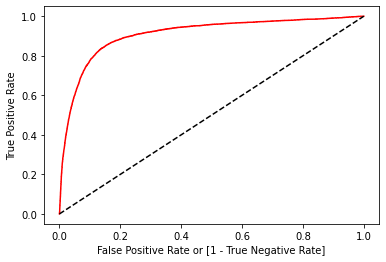

In [24]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label='logit model (area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [25]:
auc

0.6801796851373886